In [3]:
import pandas as pd
import numpy as np
from utils import MusicDataLoader
from collections import Counter

loader = MusicDataLoader()
mus_nodes = loader.get_features(n_release_bins=100)



Quick look at dataset distribution

In [4]:
print(f'Collected release data between {pd.to_datetime(mus_nodes.first_release).min()} and {pd.to_datetime(mus_nodes.last_release).max()}')
# print
genrecounts = Counter([g for gg in mus_nodes.genres.values.tolist() for g in gg])

print(f'{len(genrecounts)} genres available in dataset')
# print(f'')

Collected release data between 1890-01-01 00:00:00 and 2020-12-31 00:00:00
3031 genres available in dataset


Ok cool, what are our genre distributions looking like then?

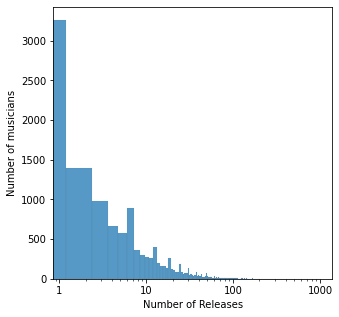

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

fig = sns.histplot(data=mus_nodes,x='num_release')
fig.set(
    xscale='log',
    xlabel='Number of Releases',
    ylabel='Number of musicians',
    # showxticks=''
)

fig.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.get_figure().savefig('pics/features/release_distribution.png',dpi=300)

# sorted(list(Counter(mus_nodes.num_release.values).items()))

In [35]:
released_any = mus_nodes[mus_nodes.num_release > 0]

(released_any.num_release <= 3).sum()/len(released_any)

0.42162248228644217

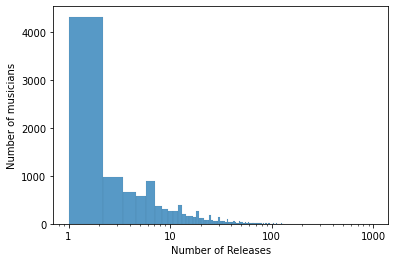

In [34]:
fig = sns.histplot(data=released_any,x='num_release')
fig.set(
    xscale='log',
    xlabel='Number of Releases',
    ylabel='Number of musicians',
    # showxticks=''
)

fig.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
